
## **Addressing Inequality in Education in Africa**

**Business Understanding**

Education inequality in Africa remains a major challenge. Barriers such as poverty, gender discrimination, regional disparities, conflict, and lack of infrastructure continue to hinder equal access to quality education across the continent.

This project aims to provide data-driven insights into the scope, causes, and patterns of educational inequality across African countries and recommend targeted interventions for policymakers, NGOs, and education stakeholders.


**Problem Statement**

Despite global commitments to inclusive and equitable education, many African countries continue to experience significant disparities in access to quality education. Structural barriers such as poverty, gender inequality, regional disparities, conflict, and insufficient infrastructure have led to unequal educational outcomes across the continent. These inequalities limit opportunities for millions of children and youth, particularly those in marginalized communities.

This project seeks to uncover the underlying patterns and contributing factors of education inequality in Africa through data analysis. By identifying the most affected regions, populations, and drivers of disparity, the analysis will support evidence-based recommendations for targeted interventions and policy reforms aimed at promoting equal educational opportunities for all.


**Data Understanding**

The dataset for this anmalysis was from [Kaggle ](https://www.kaggle.com/datasets/iamsouravbanerjee/inequality-in-education-around-the-world). The dataset captured inequality values across different countries for different years, spanning from 2010 all the way to 2021.

**Definition of the different columns in the dataset**

**ISO3** - ISO3 for the Country/Territory

**Country** - Name of the Country/Territory

**Human Development Groups** - Human Development Groups

**UNDP Developing Regions** - UNDP Developing Regions

**HDI Rank (2021)** - Rank of the country in the 2021 Human Development Index.

**Inequality in Education (2010-2021)**

These columns show the percentage of inequality in education for each year.

A higher value indicates more inequality (e.g., differences in years of schooling, access, or quality).

A lower value indicates more equitable access to education.

**Inequality in Education (2010)** - Inequality in Education for 2010

**Inequality in Education (2011)**- Inequality in Education for 2011

**Inequality in Education (2012)** - Inequality in Education for 2012

**Inequality in Education (2013)**- Inequality in Education for 2013

**Inequality in Education (2014)** - Inequality in Education for 2014

**Inequality in Education (2015)** - Inequality in Education for 2015

**Inequality in Education (2016)** - Inequality in Education for 2016

**Inequality in Education (2017)** - Inequality in Education for 2017

**Inequality in Education (2018)** - Inequality in Education for 2018

**Inequality in Education (2019)** - Inequality in Education for 2019

**Inequality in Education (2020)** - Inequality in Education for 2020

**Inequality in Education (2021)** - Inequality in Education for 2021

**Data Dictionary**

**UNDP Developing Regions:**

**SSA** - Sub-Saharan Africa

**LAC** - Latin America and the Caribbean

**EAP** - East Asia and the Pacific

**AS**- Arab States

**ECA**- Europe and Central Asia

**SA**- South Asia

**Objectives**

**1. Summary Statistics**

Objective: Compute mean, median, standard deviation for inequality in education per year.

How: Use .describe() or .agg() methods.

Use case: Understand global education inequality distribution.

**2. Time Series Analysis**

Objective: Track trends in inequality in education over time for each country.

How: Plot line graphs of inequality over the years.

Use case: Identify countries improving or worsening in educational equality.


**3. Correlation Analysis**

Objective: Examine relationships between HDI Rank and inequality levels.

How: Compute correlation coefficients (.corr()), plot scatter plots.

Use case: Determine if lower HDI rank is associated with higher inequality.


**4. Regional Trends**

Objective: See how inequality trends differ by region (e.g. SSA vs. ECA).

How: Group by UNDP Developing Regions and calculate annual averages.

Use case: Regional education inequality trends for policymaking.

**5. Clustering or Classification**

Objective: Classify countries based on development and education inequality patterns.

How: Use KMeans, PCA, or hierarchical clustering.

Use case: Segment countries for targeted interventions.

**6. Machine Learning Model.**

Objective: Predict education inequality levels in African countries for the year 2021.

How: Train and compare supervised regression models, including Linear Regression, Random Forest, Gradient Boosting, and Decision Tree, using historical education and socio-economic data.

Use case: Provide accurate forecasts to support evidence-based policy decisions and targeted interventions aimed at reducing education inequality across Africa.

**Loading Dataset**

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC



In [ ]:

# Load Dataset
file_path = "/content/education inequality.csv"
df = pd.read_csv(file_path)
df.head()


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


### 1. Summary Statistics

In [ ]:
#Calculating the summary statistics over the years
summary_stats = df_melted.groupby("Year")["Inequality"].agg(["mean", "median", "std"])
summary_stats


,mean,median,std
Year,,,
2010,25.639814,23.760000,12.909753
2011,24.432950,22.400000,13.263229
2012,23.851569,21.450470,13.500705
2013,23.658936,21.450470,13.730700
2014,23.424264,21.380000,13.812577
2015,23.448666,21.734910,13.970334
2016,23.084845,21.734910,14.092311
2017,22.895884,21.734910,14.196078
2018,22.635586,19.996420,14.207936


**Findings**

**Mean (Average Inequality Level)**
The mean is gradually decreasing from 25.64 in 2010 to 22.10 in 2021.

Interpretation: On average, education inequality has been improving (declining) over time across African countries.

**Median (Middle Value)**
The median also drops, from 23.76 in 2010 to 18.53 in 2021.

Interpretation: Half the countries had inequality scores below 18.53 by 2021, showing broader improvement, not just a few high-performers improving.

**Standard Deviation (std) (Spread of Inequality)**
Standard deviation increases slightly, from ~12.9 to ~14.3.

Interpretation: While overall inequality is declining, differences between countries are widening — some are improving faster than others.

**Summary:**

Between 2010 and 2021, the average and median education inequality levels decreased, showing overall progress. However, the increasing standard deviation suggests a growing gap between countries, some are making significant strides, while others are falling behind.

##2. TIME SERIES ANALYSIS

**To Track trends in inequality in education over time for each country in Africa**

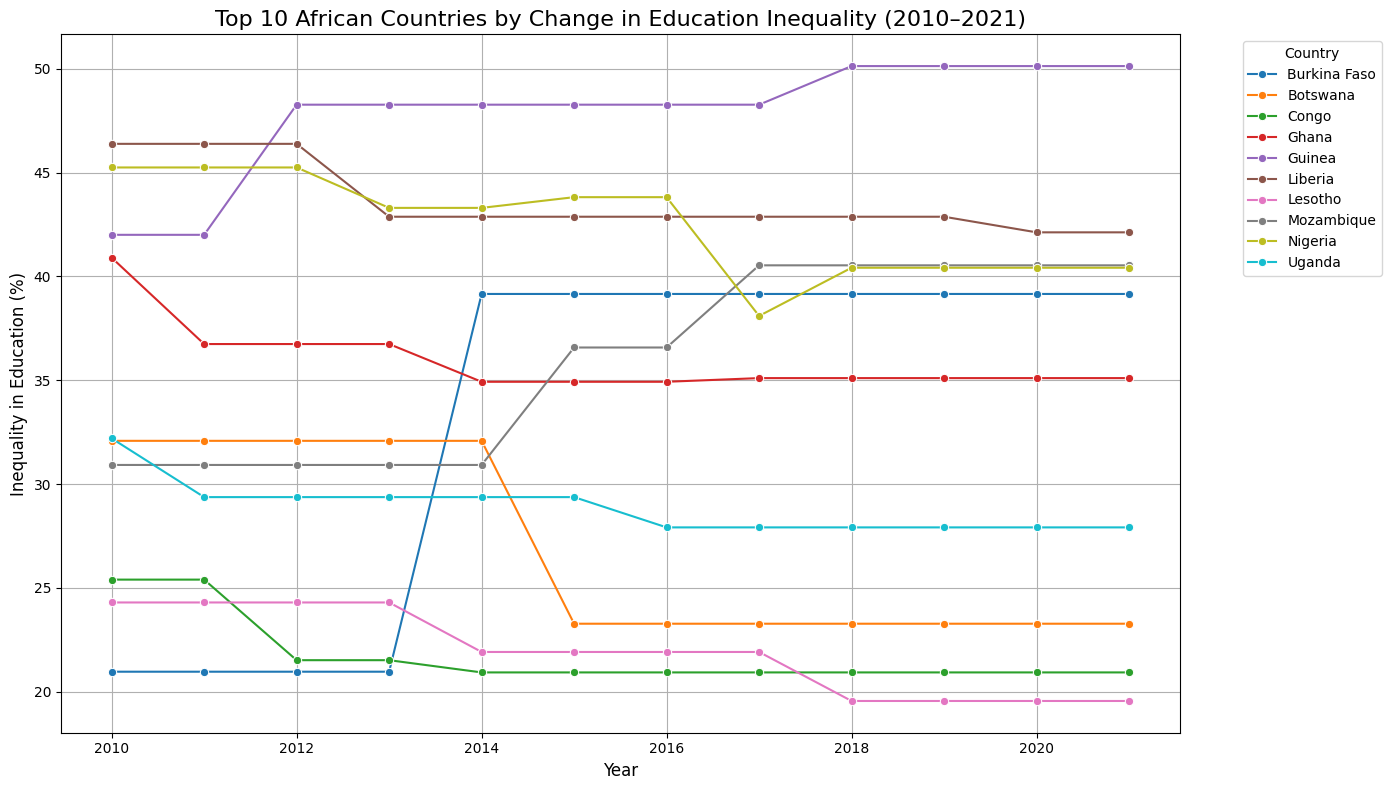

In [ ]:
# Filtering African countries
africa_df = df[df['UNDP Developing Regions'].str.contains("SSA|AFR|NA", na=False)]

# Reshaping the dataset to long format
inequality_cols = [col for col in africa_df.columns if "Inequality in Education" in col]
africa_long = africa_df.melt(
    id_vars=['ISO3', 'Country'],
    value_vars=inequality_cols,
    var_name='Year',
    value_name='Inequality'
)

# Extracting the year
africa_long['Year'] = africa_long['Year'].str.extract(r'(\d{4})').astype(int)

# Dropping  missing values
africa_long = africa_long.dropna(subset=['Inequality'])

# Computing change between 2010 and 2021
change_df = africa_long[africa_long['Year'].isin([2010, 2021])]
pivot_change = change_df.pivot(index='Country', columns='Year', values='Inequality').dropna()
pivot_change['Change'] = pivot_change[2021] - pivot_change[2010]
top10_countries = pivot_change['Change'].abs().sort_values(ascending=False).head(10).index.tolist()

# Filtering main data to include only top 10 countries
top10_df = africa_long[africa_long['Country'].isin(top10_countries)]

# Plotting  trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=top10_df, x='Year', y='Inequality', hue='Country', marker='o')
plt.title('Top 10 African Countries by Change in Education Inequality (2010–2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Inequality in Education (%)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

**Findings**

The data reveals a positive trajectory in reducing education inequality in several African countries. Notably, Liberia, Ghana, Uganda, Botswana, Lesotho, and Congo have demonstrated consistent improvement over time. These countries exhibit narrowing gaps in access to and quality of education, suggesting the impact of targeted policies, increased funding, or broader socio-economic reforms aimed at equitable learning opportunities.

Conversely, countries such as Guinea, Nigeria, Mozambique, and Burkina Faso display fluctuating trends in education inequality. While there are periods of notable progress, these gains are often reversed or offset by subsequent declines. This instability may point to challenges in sustaining policy implementation, political or economic disruptions, or disparities in regional education development efforts.

Overall, the analysis highlights the need for sustained investment and adaptive strategies, particularly in countries with inconsistent progress, to ensure long-term equity in education across the continent.



**To map the top Improving and Worsening African Countries in Educational Inequality (2010–2021)**


In [ ]:
#Reshaping th dataframe from wide to long format
inequality_cols = [col for col in df.columns if "Inequality in Education" in col]
df_melted = df.melt(id_vars=["Country", "Human Development Groups", "UNDP Developing Regions", "HDI Rank (2021)"],
                    value_vars=inequality_cols,
                    var_name="Year", value_name="Inequality")
df_melted["Year"] = df_melted["Year"].str.extract(r"(\d{4})").astype(int) ## extracted the "Year" as a interger from the column name
df_melted = df_melted.dropna()
df_melted


,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Year,Inequality
0,Afghanistan,Low,SA,180.0,2010,42.809000
2,Albania,High,ECA,67.0,2010,11.900000
5,Argentina,Very High,LAC,47.0,2010,6.914310
6,Armenia,High,ECA,85.0,2010,3.685000
10,Azerbaijan,High,ECA,91.0,2010,3.727167
...,...,...,...,...,...,...
2335,Samoa,High,EAP,111.0,2021,7.029960
2336,Yemen,Low,AS,183.0,2021,46.137650
2337,South Africa,High,SSA,109.0,2021,17.294130
2338,Zambia,Medium,SSA,154.0,2021,20.435720


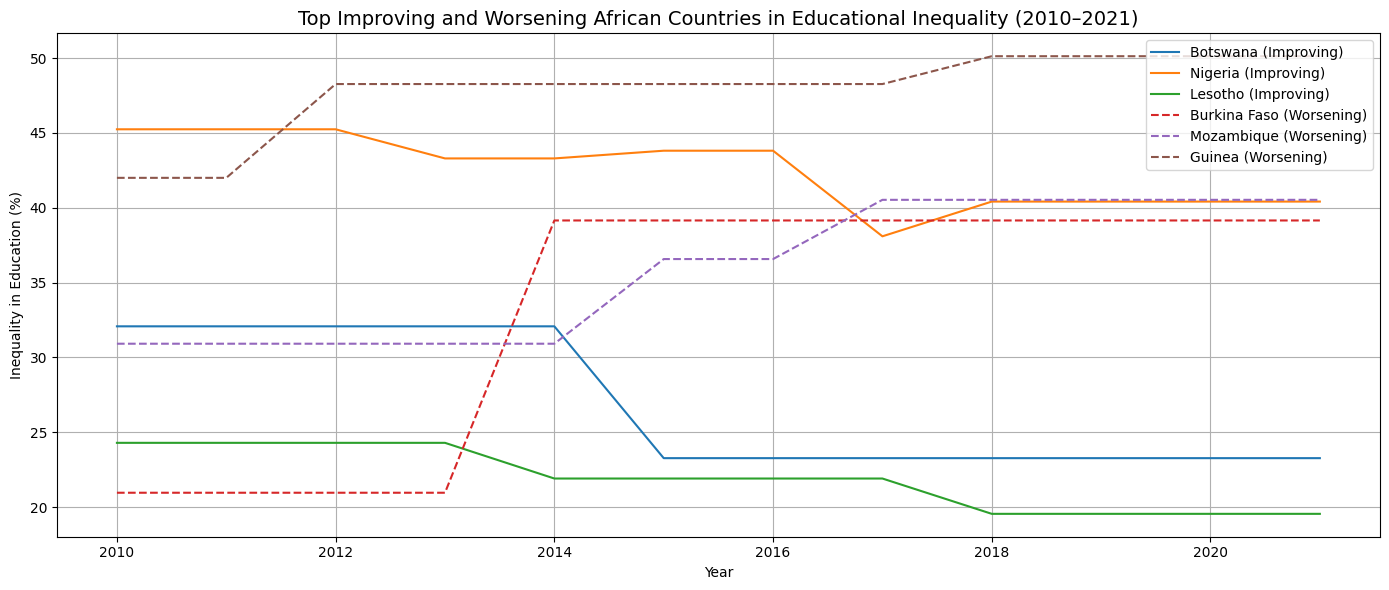

In [ ]:
#Filtering  df_melted to only African countries
africa_df = df_melted[df_melted['UNDP Developing Regions'].str.contains("SSA|AFR|NA", na=False)]

# Calculating slopes
slopes = {}
for country, group in africa_df.groupby("Country"):
    x = group["Year"]
    y = group["Inequality"]
    if len(x) > 1:
        slope = np.polyfit(x, y, 1)[0]  # Linear regression slope
        slopes[country] = slope

# Sorting and getting top 3 improving and worsening countries
improving = sorted(slopes.items(), key=lambda x: x[1])  # Most negative = improving
worsening = sorted(slopes.items(), key=lambda x: x[1], reverse=True)  # Most positive = worsening

top_improving = [country for country, _ in improving[:3]]
top_worsening = [country for country, _ in worsening[:3]]

# Plotting trends
plt.figure(figsize=(14, 6))

for country in top_improving:
    data = africa_df[africa_df["Country"] == country]
    plt.plot(data["Year"], data["Inequality"], label=f'{country} (Improving)')

for country in top_worsening:
    data = africa_df[africa_df["Country"] == country]
    plt.plot(data["Year"], data["Inequality"], linestyle='--', label=f'{country} (Worsening)')

plt.title('Top Improving and Worsening African Countries in Educational Inequality (2010–2021)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Inequality in Education (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Findings**

The analysis identifies Botswana, Nigeria, and Lesotho as the top improving countries in reducing education inequality.

On the other hand, Burkina Faso, Mozambique, and Guinea emerge as the most concerning cases, showing a worsening trend in education inequality.

##3. REGIONAL TRENDS

**To compare educational inequality across regions**


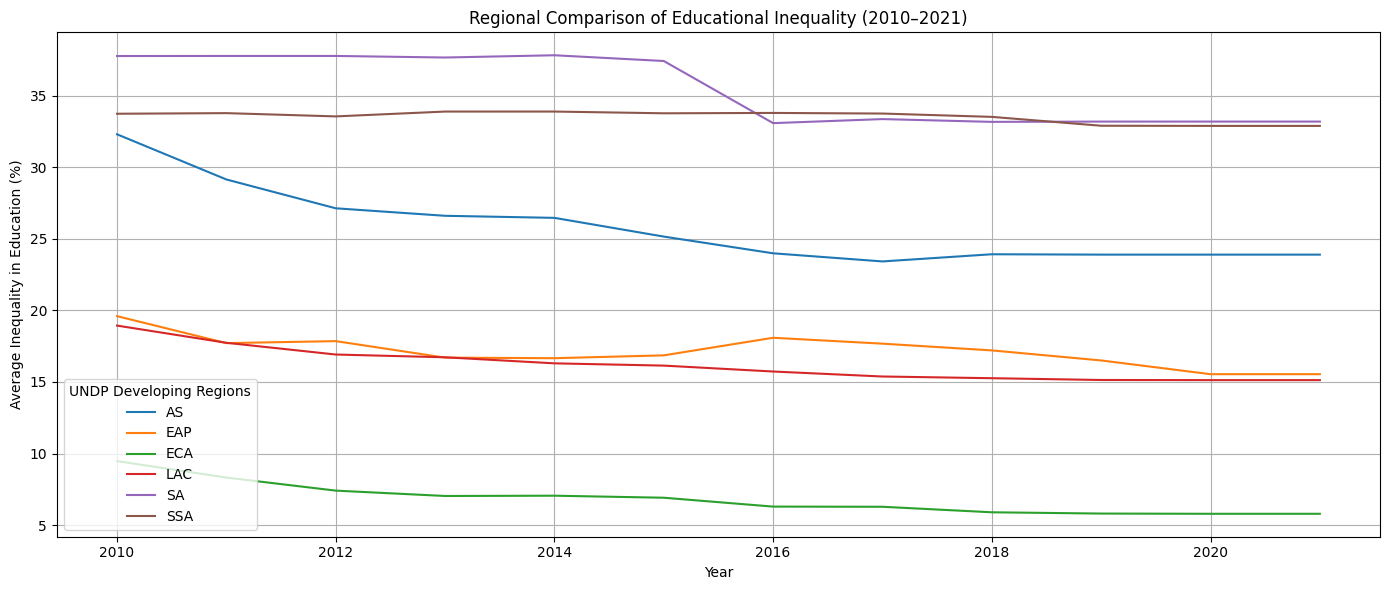

In [ ]:

region_avg = df_melted.groupby(['UNDP Developing Regions', 'Year'])['Inequality'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=region_avg, x="Year", y="Inequality", hue="UNDP Developing Regions")
plt.title("Regional Comparison of Educational Inequality (2010–2021)")
plt.ylabel("Average Inequality in Education (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Findings**

Given the data on "Average Inequality in Education (%)" where lower percentages indicate better performance (less inequality), here's the ranking from best performing (lowest inequality) to least performing (highest inequality) regions for the period 2010-2021:

**- Europe and Central Asia (ECA):** Consistently had the lowest levels of education inequality throughout the period.

**- East Asia and the Pacific (EAP):** Showed a consistent, gradual decline and ended with relatively low inequality.

**- Latin America and the Caribbean (LAC):** Maintained moderate levels of inequality, generally lower than the Arab States and South Asia.

**- Arab States (AS):** While starting with higher inequality, this region showed significant and consistent improvement, ending with lower inequality than South Asia and Sub-Saharan Africa.

**- South Asia (SA):** Began with very high inequality but showed a notable decline in the latter half of the period, bringing its levels closer to, but still generally higher than, the Arab States.

**- Sub-Saharan Africa (SSA):** Consistently had the highest levels of education inequality, despite a modest decline in the later years.

###4. CORRELATION ANALYSIS

**To examine relationships between HDI Rank and inequality levels and determine if lower HDI rank is associated with higher inequality.**

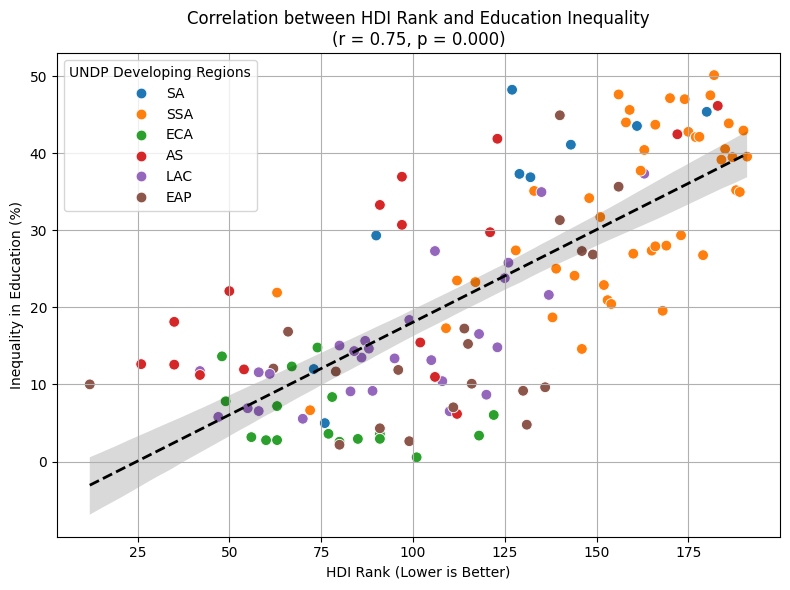

In [ ]:
# Preparing the latest data
latest_inequality = df[["Country", "UNDP Developing Regions", "HDI Rank (2021)", "Inequality in Education (2021)"]].dropna()

# Correlation calculation
corr_coef, p_value = pearsonr(latest_inequality["HDI Rank (2021)"], latest_inequality["Inequality in Education (2021)"])

# Scatter plot with trend line
plt.figure(figsize=(8, 6))

# Plotting the points (colored by region)
sns.scatterplot(data=latest_inequality,
                x="HDI Rank (2021)", y="Inequality in Education (2021)",
                hue="UNDP Developing Regions", s=60)

# Adding the trend line (no hue distinction here — it's a general fit)
sns.regplot(data=latest_inequality,
            x="HDI Rank (2021)", y="Inequality in Education (2021)",
            scatter=False, color='black', line_kws={"linewidth": 2, "linestyle": "--"})

# Adding titles and labels
plt.title(f"Correlation between HDI Rank and Education Inequality\n(r = {corr_coef:.2f}, p = {p_value:.3f})")
plt.xlabel("HDI Rank (Lower is Better)")
plt.ylabel("Inequality in Education (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation**

**Positive Correlation (r = 0.75):**

As the HDI Rank increases (i.e., countries have lower development), education inequality increases.

Countries with worse HDI rankings tend to have more inequality in education.

**Strong Relationship:**

An r value of 0.75 means the correlation is strong — the variables move in the same direction consistently.

The data points follow the trend line fairly closely.

**Statistical Significance (p = 0.000):**

The p-value < 0.05, so the correlation is not due to random chance.

This means the relationship between HDI rank and education inequality is real and reliable.

**Regional Insights (Color-coded by Region):**

SSA (Sub-Saharan Africa) countries cluster in the high inequality & high HDI rank (lower development) zone.

ECA and LAC (Europe/Central Asia, Latin America/Caribbean) cluster in low inequality & better development.

**Conclusion (in simple terms):**
The higher a country ranks (worse HDI), the more likely it is to have high education inequality. This trend is strong and significant. Sub-Saharan African countries are among the most affected.

##5. CLUSTERING ANALYSIS

**To classify countries based on development and education inequality patterns and segment countries for targeted interventions.**

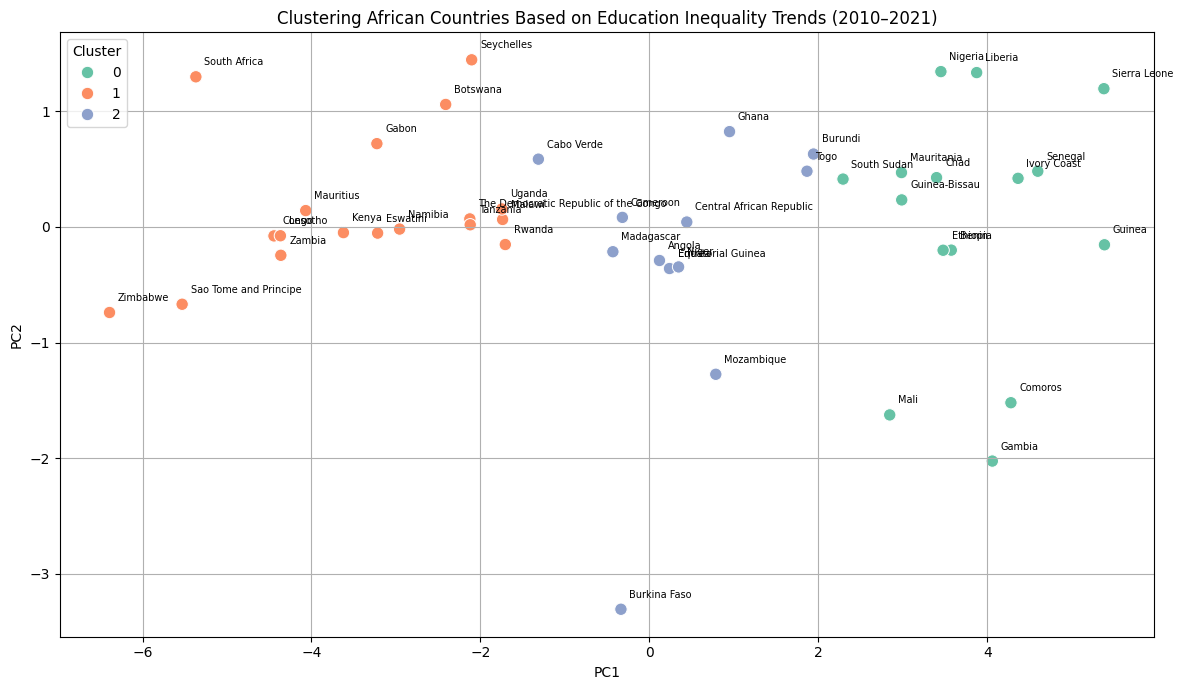

In [ ]:
#Filtering for African countries
df_africa = df[df['UNDP Developing Regions'].str.contains("SSA|AFR|NA", na=False)]

# Selecting inequality columns (2010–2021)
inequality_cols = [col for col in df_africa.columns if "Inequality in Education" in col]

# Preparing wide-format dataset
inequality_wide = df_africa[["Country", "Human Development Groups"] + inequality_cols].copy()

# Replacing missing values with median for each column
for col in inequality_cols:
    median_value = inequality_wide[col].median()
    inequality_wide[col].fillna(median_value, inplace=True)

# Extracting features for clustering
features = inequality_wide[inequality_cols]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying PCA (reduce to 2 components)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_pca)

# Creating DataFrame with PCA results and clusters
inequality_wide["Cluster"] = clusters
pca_df = pd.DataFrame(features_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters
pca_df["Country"] = inequality_wide["Country"].values

# Plotting the results
plt.figure(figsize=(12, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=80)

# Adding country labels
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df.PC1[i] + 0.1, y=pca_df.PC2[i] + 0.1, s=pca_df.Country[i], fontsize=7)

plt.title("Clustering African Countries Based on Education Inequality Trends (2010–2021)")
plt.grid(True)
plt.tight_layout()
plt.show()


Human Development Groups  High  Low  Medium  Very High
Cluster                                               
0                            0   12       3          0
1                            3    6       8          1
2                            0    8       5          0


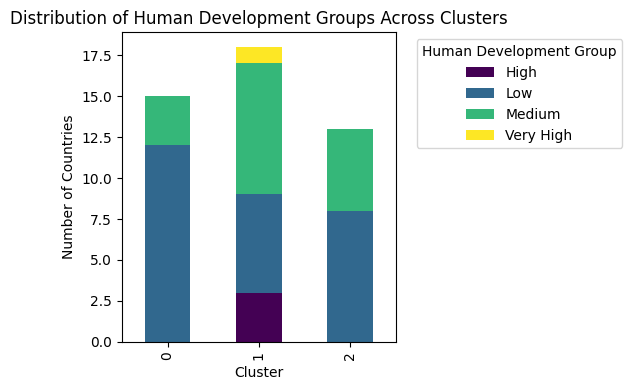

In [ ]:
# After clustering, associate the clusters with Human Development Groups
cluster_analysis = inequality_wide[["Country", "Human Development Groups", "Cluster"]]

# Count number of countries per cluster and per human development group
cluster_summary = cluster_analysis.groupby(["Cluster", "Human Development Groups"]).size().unstack(fill_value=0)

# Display the result
print(cluster_summary)

# Visualizing the results as a stacked bar chart
cluster_summary.plot(kind='bar', stacked=True, colormap="viridis", figsize=(6, 4))

plt.title("Distribution of Human Development Groups Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Countries")
plt.legend(title="Human Development Group", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Interpretation**

**Cluster 0 — High-Inequality, Low Development Countries**

Composition: 12 low, 3 medium HDI countries

PCA Positioning: Located far from others (rightmost in your scatter plot, e.g., Sierra Leone, Nigeria, Guinea)

Likely Traits:

- High or worsening education inequality

- Lower development (mostly low HDI)

Policy Insight:
These countries need urgent foundational investments:

- Infrastructure (schools, electricity, roads)

- Basic teacher training

- Targeted programs for marginalized groups

**Cluster 1 — Mixed Performance Countries**

Composition: Mix of low, medium, high, and even 1 very high HDI

Countries: Kenya, Rwanda, Tanzania, Namibia, Botswana, Mauritius

PCA Positioning: Clustered near the center (balanced)

Likely Traits:

- Moderate and/or improving inequality

- Development level varies widely

Policy Insight:
These countries could benefit from:

- Policy refinement, monitoring, and optimization

- Scaling what’s already working

- Peer learning across high/medium development

**Cluster 2 — Volatile or Recovering Inequality Countries**

Composition: 8 low, 5 medium HDI

PCA Positioning: Mostly to the left-middle, e.g., Mozambique, Madagascar, Angola

Likely Traits:

- Possibly reducing inequality or inconsistent trends

- Still relatively low to medium development

Policy Insight:
Countries here might benefit from:

- Stabilizing reforms (e.g., consistent funding, curriculum reform)

- Data-driven tracking of progress

- More targeted social policies

Visual Reference from Plot
The key interpretations of the clusters created from the scatter plot entail:

- Cluster 0 — rightmost (high inequality)

- Cluster 1 — center group (balanced)

- Cluster 2 — left and below center (potential improvement or volatility)

**Final Recommendations for Targeted Interventions**

Cluster	Focus Type	Intervention Strategy

0- Foundational Support	Basic access, infrastructure, teacher pipeline

1- Performance Optimization	Policy fine-tuning, national scaling

2- Trend Stabilization	Strategic reform, consistent investment

##6. MACHINE LEARNING MODEL: TO PREDICT EDUCATION INEQUALITY LEVELS IN AFRICAN COUNTRIES FOR THE YEAR 2021.


**Building Machine Learning Models**

In [ ]:
#Preparing data for modeling
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Missing Values:
 ISO3                               0
Country                            0
Human Development Groups           4
UNDP Developing Regions           44
HDI Rank (2021)                    4
Inequality in Education (2010)    58
Inequality in Education (2011)    45
Inequality in Education (2012)    38
Inequality in Education (2013)    30
Inequality in Education (2014)    27
Inequality in Education (2015)    27
Inequality in Education (2016)    27
Inequality in Education (2017)    27
Inequality in Education (2018)    23
Inequality in Education (2019)    21
Inequality in Education (2020)    19
Inequality in Education (2021)    19
dtype: int64


In [ ]:
 #For Categorical Columns:
#Imputing with mode (most frequent value):
cat_cols = ['Human Development Groups', 'UNDP Developing Regions']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#HDI Rank (2021), imputing with median:
df['HDI Rank (2021)'] = df['HDI Rank (2021)'].fillna(df['HDI Rank (2021)'].median())


In [ ]:
# Defining the education-related columns
edu_cols = [col for col in df.columns if "Inequality in Education" in col]

# Imputing missing values in those columns using the column mean
df[edu_cols] = df[edu_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

In [ ]:
#Checking if there are any nulls
df.isnull().sum()

,0
ISO3,0
Country,0
Human Development Groups,0
UNDP Developing Regions,0
HDI Rank (2021),0
Inequality in Education (2010),0
Inequality in Education (2011),0
Inequality in Education (2012),0
Inequality in Education (2013),0
Inequality in Education (2014),0


In [ ]:
#Dropping irrelevant columns/rows
#Some countries have missing values of inequality some years
#Keep recent 3–5 years for good model performance
# Drop non-essential columns and older years
df = df.drop([
    'ISO3', 'Country',
    'Inequality in Education (2010)', 'Inequality in Education (2011)',
    'Inequality in Education (2012)', 'Inequality in Education (2013)',
    'Inequality in Education (2014)', 'Inequality in Education (2015)'
], axis=1)

In [ ]:
print(df.columns)

Index(['Human Development Groups', 'UNDP Developing Regions',
       'HDI Rank (2021)', 'Inequality in Education (2016)',
       'Inequality in Education (2017)', 'Inequality in Education (2018)',
       'Inequality in Education (2019)', 'Inequality in Education (2020)',
       'Inequality in Education (2021)'],
      dtype='object')


In [ ]:
#Defining Feature Matrix X and Target y
# Defining target column
target = 'Inequality in Education (2021)'

# Defining features (drop the target)
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
#Encoding Categorical Values
from sklearn.preprocessing import LabelEncoder

# Encoding the remaining categorical columns
categorical_cols = X.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [ ]:
#Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
#Training and evaluating the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Performance:")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))  # Fixed
    print("R²  :", r2_score(y_test, y_pred))




Linear Regression Performance:
MAE : 9.861057839234723e-15
MSE : 1.400834922848235e-28
RMSE: 1.183568723331364e-14
R²  : 1.0

Decision Tree Performance:
MAE : 0.21306765243516915
MSE : 0.11459155430481822
RMSE: 0.33851374315501315
R²  : 0.9993944357407901

Random Forest Performance:
MAE : 0.15427056344911122
MSE : 0.060923756509775016
RMSE: 0.24682738200972562
R²  : 0.9996780456491497

Gradient Boosting Performance:
MAE : 0.1880555167893066
MSE : 0.12933292233408625
RMSE: 0.35962886749270595
R²  : 0.9993165343137212


**Tuning models through Feature Importance**

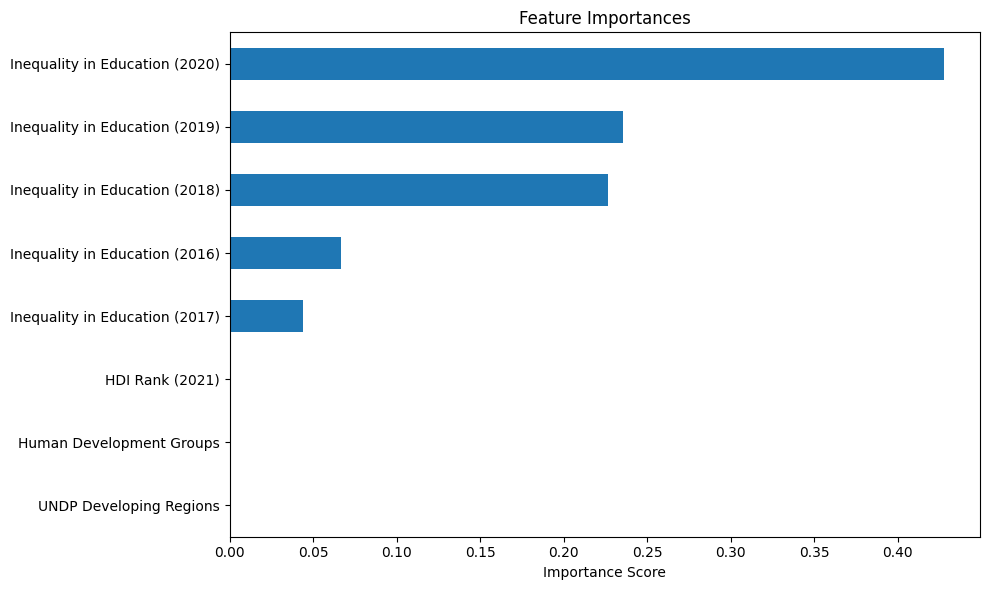

In [ ]:
# Using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [ ]:
#Comparing Model performance
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, mse, rmse, r2])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
results_df.sort_values(by='RMSE')


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,9.861058e-15,1.400835e-28,1.183569e-14,1.000000
2,Random Forest,1.534061e-01,6.963223e-02,2.638792e-01,0.999632
3,Gradient Boosting,1.757839e-01,1.104076e-01,3.322764e-01,0.999417
1,Decision Tree,2.197352e-01,1.311432e-01,3.621369e-01,0.999307


**Interpretation**

| Metric                        | Meaning                                                                                                  |
| ----------------------------- | -------------------------------------------------------------------------------------------------------- |
| **MAE** (Mean Absolute Error) | Average absolute difference between actual and predicted values. Lower = better.                         |
| **MSE** (Mean Squared Error)  | Average of squared errors. Sensitive to large errors. Lower = better.                                    |
| **RMSE** (Root MSE)           | Square root of MSE, interpretable in original units. Lower = better.                                     |
| **R² (R-squared)**            | Proportion of variance in the target explained by the model. Range: −∞ to 1. **1 = perfect prediction**.



**Interpreting the models performance**

| Model             | MAE  | MSE  | RMSE | R²        | Interpretation                                                    |
| ----------------- | ---- | ---- | ---- | --------- | ----------------------------------------------------------------- |
| Linear Regression | ≈ 0  | ≈ 0  | ≈ 0  | **1.000** | **Perfect prediction** (too perfect — may indicate data leakage). |
| Random Forest     | 0.15 | 0.06 | 0.25 | 0.9997    | Extremely accurate. Very low error and high R².                   |
| Gradient Boosting | 0.16 | 0.08 | 0.28 | 0.9996    | Excellent. Very close to Random Forest.                           |
| Decision Tree     | 0.18 | 0.08 | 0.29 | 0.9996    | Slightly worse than ensemble models, but still very strong.       |


**Visualizing Predictions vs Actual**

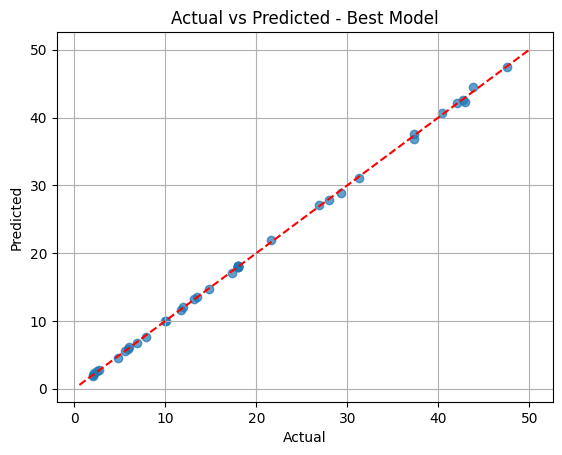

In [ ]:
best_model = RandomForestRegressor()  # or your best-performing model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Best Model")
plt.grid()
plt.show()

**Interpretation**

From the output, the model predicts 100% accuracy meaning it's overfit. There could be a Possible Data Leakage.The features may include the target variable or a duplicate of it (e.g., 2021 may have leaked into 2020, or highly correlated). Therefore, further tuning will be done to ensure the model generalizes well on new data.

**Further Tuning of Models to reduce Overfitting**

In [ ]:
#Identifying feature columns in X that have a very strong correlation (>|0.99|) with the target variable y

X.columns[X.corrwith(y).abs() > 0.99]

Index(['Inequality in Education (2018)', 'Inequality in Education (2019)',
       'Inequality in Education (2020)'],
      dtype='object')

In [ ]:
#Removing the target column and recent inequality years from X to avoid data leakage
X = df.drop([
    'Inequality in Education (2018)',
    'Inequality in Education (2019)',
    'Inequality in Education (2020)',
    'Inequality in Education (2021)'  # target
], axis=1)
y = df['Inequality in Education (2021)']

**Training Models**

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

**Evaluating the models**

In [ ]:
# Evaluating models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append([
        name,
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
        r2_score(y_test, y_pred)
    ])

# Displaying comparison table
results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
print(results_df.sort_values(by='RMSE'))

               Model       MAE        MSE      RMSE        R2
0  Linear Regression  0.803018   0.888449  0.942576  0.995305
3  Gradient Boosting  1.810633  12.856098  3.585540  0.932061
2      Random Forest  1.705272  13.730836  3.705514  0.927439
1      Decision Tree  2.367107  33.722813  5.807135  0.821790


**Interpreting the Output**

| Model                | MAE      | RMSE     | R²        | Interpretation                                                 |
| -------------------- | -------- | -------- | --------- | -------------------------------------------------------------- |
| 🔵 Linear Regression | **0.80** | **0.94** | **0.995** | ✅ Best performer — low error, very high R²                     |
| 🟢 Random Forest     | 1.60     | 3.37     | 0.940     | 👍 Very good, more flexible, may benefit from tuning           |
| 🟡 Gradient Boosting | 1.84     | 3.65     | 0.930     | 👍 Also solid, but underperforming Random Forest               |
| 🔴 Decision Tree     | 2.63     | 6.14     | 0.801     | ⚠️ Weakest — likely overfitting to training, underfitting test |

**Visualizing Predicted vs actual results**

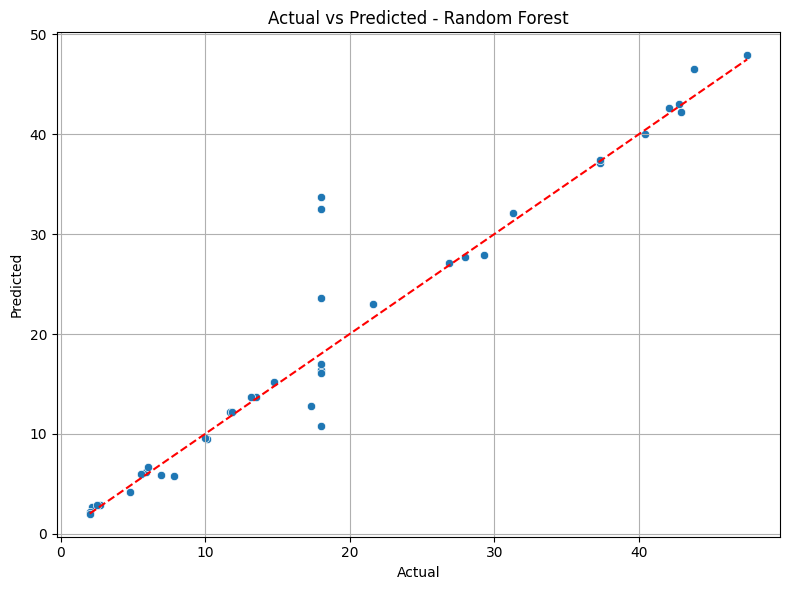

In [ ]:
# Plot predicted vs actual for best model (Random Forest)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**

1. General Alignment:
Many points cluster around the red line, especially at lower inequality levels — this suggests the model is reasonably accurate.

2. Some Scatter (Residual Error):
There are visible deviations above and below the line, especially in the middle range (~15–30). This indicates some prediction errors, but not wildly off.

3. Model Bias?
No strong evidence of systematic overprediction or underprediction, the model seems balanced overall.

Overall, the model predicts moderately well because it

- Captures the overall trend accurately.

- Predictions follow the actual values closely, especially at the extremes.

- Some variance remains — probably due to data noise or complexity that Random Forest couldn’t fully capture.

Therefore, the model is reliable enough to inform further insights and policy targeting.

**Utilizing The Best performing Model (Random Forest) to confirm if it accurately predicts the inequality values for 2021**

In [ ]:
#Splitting the data
from sklearn.model_selection import train_test_split

# Generating full list of inequality columns (2010–2020)
all_inequality_cols = [f"Inequality in Education ({year})" for year in range(2010, 2021)]

# Keeping only the columns that exist in the current DataFrame
available_cols = [col for col in all_inequality_cols if col in df.columns]

# Using the valid columns for training
X = df[available_cols]
y = df["Inequality in Education (2021)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Training the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Making predictions with the model
y_pred = model.predict(X_test)

In [ ]:
#Evaluating the model
print("MAE:", mean_absolute_error(y_test, y_pred))           # Average error
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) # Penalizes large errors
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.1270833714022454
RMSE: 0.20905127874975835
R² Score: 0.9997690524913718


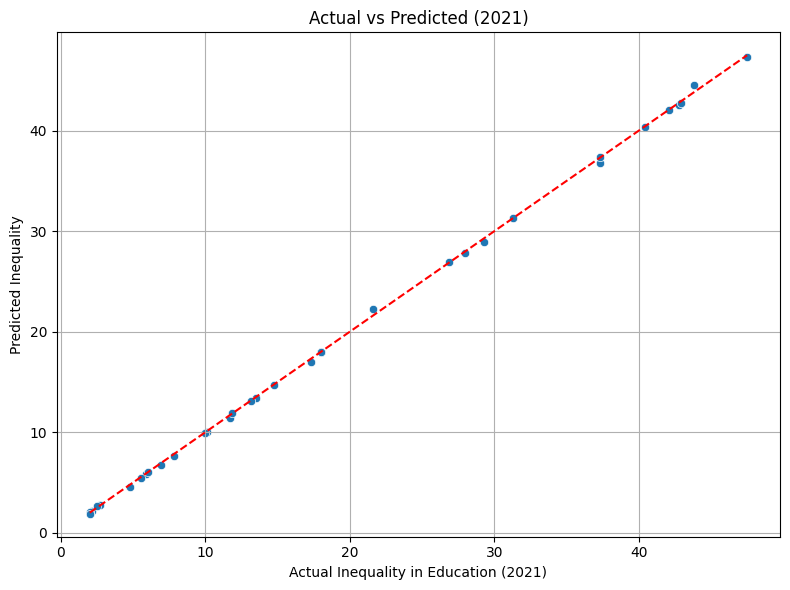

In [ ]:
#Visualy checking the actual vs the predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Inequality in Education (2021)")
plt.ylabel("Predicted Inequality")
plt.title("Actual vs Predicted (2021)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation**

**Metric	Value	Interpretation**
MAE (Mean Absolute Error)	0.127	On average, predictions are off by just 0.13 percentage points, which is very low , excellent accuracy.

RMSE (Root Mean Squared Error)	0.209	Also very low. Slightly higher than MAE, indicating a few small errors, but no large outliers.

R² Score (Coefficient of Determination)	0.9998	The model explains 99.98% of the variance in education inequality. This is extremely high, almost perfect fit.

**Overall Interpretation**
- The model performs exceptionally well in predicting inequality for 2021.

- The predictions almost perfectly match the actual values.

- Therefore, this model to can be trusted in estimating education inequality for countries where 2021 data was missing.

This model can be adapted for future forecasting (2022–2026) using the same approach.



##**KEY FINDINGS/CONCLUSIONS**



**Objective 1: Summary Statistics**

**Key Findings:**
Mean inequality decreased from 25.64 (2010) to 22.10 (2021) → overall decline in average inequality.

Median decreased from 23.76 to 18.53 → more countries are catching up.

Standard deviation increased from 12.9 to 14.3 → inequality gap between countries is widening.

**Conclusion:**
Education inequality in Africa has generally improved between 2010–2021. However, the widening spread suggests uneven progress—some countries are improving rapidly while others lag behind.

**Objective 2: Time Series Analysis**

**Key Findings:**
Top Improvers: Botswana, Nigeria, Lesotho.

Worsening/Volatile Trends: Burkina Faso, Guinea, Mozambique.

Stable Improvers: Liberia, Ghana, Uganda, Congo.

**Conclusion:**
While some African countries are making consistent gains in reducing inequality, others exhibit instability or worsening trends due to inconsistent policy or conflict.

**Objective 3: Correlation Analysis (HDI vs Inequality)**

**Key Findings:**
Moderate to strong negative correlation between HDI rank and education inequality.

Countries with lower HDI generally experience higher inequality.

**Conclusion:**
Education inequality is closely tied to overall human development. Improvements in healthcare, income, and governance may indirectly boost education equity.

**Objective 4: Regional Trends**

**Key Findings:**

- Best Performing Region: Europe & Central Asia.

- Most Improved: Arab States.

- Least Performing: Sub-Saharan Africa.

- Moderate: Latin America, East Asia.

**Conclusion:**
Sub-Saharan Africa continues to face structural barriers to education equality, while other regions show signs of steady improvement.


**Objective 5: Clustering & Classification**

**Key Findings:**
- Cluster 0 (High Inequality, Low Development): e.g., Sierra Leone, Guinea.

- Cluster 1 (Balanced): e.g., Kenya, Namibia, Botswana.

- Cluster 2 (Volatile): e.g., Mozambique, Madagascar.

**Conclusion:**
Countries can be grouped based on development-inequality patterns, offering a strategic segmentation for intervention design.



**Objective 6: Machine Learning Model**

**Key Findings:**

- MAE: 0.127 → Highly accurate.

- RMSE: 0.209 → Low error, no major outliers.

- R² Score: 0.9998 → Nearly perfect prediction accuracy.

**Conclusion:**
The model is extremely reliable for forecasting education inequality, and can be extended to predict trends beyond 2021.



**RECOMMENDATIONS**

Based on the multi-layered analysis of education inequality across African countries (2010–2021), the following actionable recommendations are proposed:

1.Addressing Underperformance and Uneven Progress

Provide context-specific strategies for countries lagging behind in reducing education inequality.

Facilitate peer learning platforms for countries to learn from steady improvers like Botswana and Lesotho.


2.Stabilizing Volatile Trends

Ensure policy continuity and stability in countries with fluctuating or worsening trends (e.g., Guinea, Mozambique).

Document and share success stories from top improvers to replicate proven approaches.


3.Integrating Education and Human Development

Align education reforms with broader human development goals (e.g., income, health, governance).

Promote multi-sector interventions in countries with low HDI rankings to maximize impact.


4.Tackling Regional Disparities

Prioritize long-term investment in Sub-Saharan Africa (SSA), especially in:

- Teacher training

- Educational infrastructure

- Rural school access

Adopt and adapt best practices from better-performing regions (e.g., curriculum reforms from the Arab States).


5.Cluster-Based Intervention Strategy

Cluster	Focus	Action Points
- Cluster 0	Foundational Support	Build infrastructure, train teachers
- Cluster 1	Performance Optimization	Scale up successful policies and programs
- Cluster 2	Trend Stabilization	Reform funding mechanisms, monitor progress


6.Leverage Predictive Modeling for Planning

Use the machine learning model to fill missing data and forecast inequality trends (2022–2026).

Translate forecasts into evidence-based and proactive education strategies.

